# Regressione lineare #
In quanto segue tento di addestrare una rete neurale per la regressione lineare. Dapprima eseguo tutto usando un solo neurone, la cui capacità rappresentativa a due parametri addestrabili (non usando la funzione di attivazione che introduce un effetto di non linearità) basta per rappresentare la complessità del problema.

Considero la retta da fittare:
$$
f(x)=2x+1
$$

Definisco i parametri della retta.

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Genero ora dati "sporcati" rispetto a dei perfetti dati sulla retta tramite del rumore gaussiano.

In [21]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
# Non useremo i dati y_target.

sigma = 0.01 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

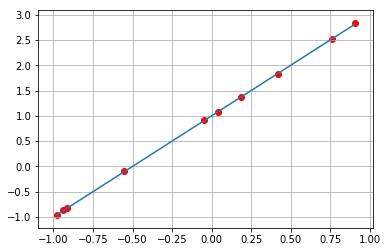

In [22]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

Creo un modello di rete neurale usando con un solo neurone.

In [25]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()  # Modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # Aggiungo un layer fatto da un solo neurone.

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [26]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Eseguo ora il training della rete neurale.

In [35]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=16, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 10 samples
Epoch 1/30
1000/1000 [==============================] - 0s 117us/sample - loss: 9.3671e-05 - mean_squared_error: 9.3671e-05 - val_loss: 7.0922e-05 - val_mean_squared_error: 7.0922e-05
Epoch 2/30
1000/1000 [==============================] - 0s 127us/sample - loss: 9.3650e-05 - mean_squared_error: 9.3650e-05 - val_loss: 7.1114e-05 - val_mean_squared_error: 7.1114e-05
Epoch 3/30
1000/1000 [==============================] - 0s 141us/sample - loss: 9.3635e-05 - mean_squared_error: 9.3635e-05 - val_loss: 7.0420e-05 - val_mean_squared_error: 7.0420e-05
Epoch 4/30
1000/1000 [==============================] - 0s 120us/sample - loss: 9.3654e-05 - mean_squared_error: 9.3654e-05 - val_loss: 6.9966e-05 - val_mean_squared_error: 6.9966e-05
Epoch 5/30
1000/1000 [==============================] - 0s 118us/sample - loss: 9.3650e-05 - mean_squared_error: 9.3650e-05 - val_loss: 6.9046e-05 - val_mean_squared_error: 6.9046e-05
Epoch 6/30
1000/1000 [============

In [36]:
# return weights
model.get_weights()

[array([[1.9994748]], dtype=float32), array([1.000269], dtype=float32)]

In [37]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 96us/sample - loss: 7.0516e-05 - mean_squared_error: 7.0516e-05

Test loss: 7.051642751321197e-05
Test accuracy: 7.051643e-05


In [38]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 149us/sample - loss: 2.3066e-07 - mean_squared_error: 2.3066e-07

Test loss: 2.3066195353749208e-07
Test accuracy: 2.3066195e-07


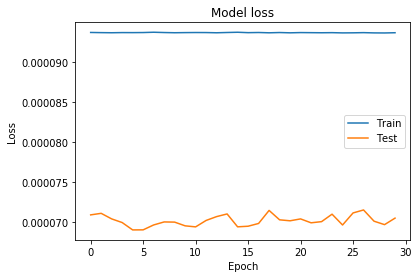

In [39]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

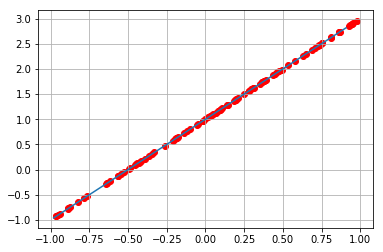

In [40]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

# Fit polinomiale #
Ora il mio obiettivo è quello di creare un fit polinomiale di dati noisy a partire da un polinomio di terzo grado:
$$
f(x) = 4 - 3x - 2x^2 +3x^3
$$

In [1]:
# Imposto i parametri del polinomio.
a = 4
b = -3
c = -2
d = 3

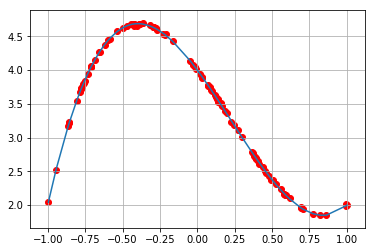

In [172]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3 # ideal (target) linear function
# Non useremo i dati y_target.

sigma = 0.01 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

# Qui faccio stampare i dati che ho.
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

Dopo alcuni tentativi, ho deciso di realizzare una rete neurale fatta in questo modo:
<ul>
    <li>Un layer di input a singolo neurone, privo di funzione di attivazione </li>    
    <li>Un layer profondo da 20 neuroni con attivazione a tangente iperbolica</li>
    <li>Un layer profondo da 20 neuroni con attivazione RELU</li>
    <li>Un layer profondo da 10 neuroni con attivazione a tangente iperbolica</li>
    <li>Un layer di output a singolo neurone, privo di funzione di attivazione.
</ul>

In [156]:
# In questo blocco preparo la rete neurale.
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()  # Modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # Aggiungo un layer fatto da un solo neurone.
model.add(Dense(20,activation = 'tanh'))   # Qui ho un altro layer di 10 neuroni con una RELU come
# funzione di attivazione.
model.add(Dense(20,activation = 'relu'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(1,)) # Il layer di uscita ha un solo neurone, per ora senza funzione di attivazione.

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_107 (Dense)            (None, 20)                40        
_________________________________________________________________
dense_108 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_109 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 11        
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


Questo sistema ha quindi 683 parametri liberi. Procedo all'allenamento del sistema usando 30 epoche e una size del batch di 32.

In [157]:
bsize =32  # il codice funziona meglio usando potenze di 2.
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=bsize, epochs=30, 
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 100 samples
Epoch 1/30
5000/5000 [==============================] - 2s 475us/sample - loss: 1.0909 - mean_squared_error: 1.0909 - val_loss: 0.2789 - val_mean_squared_error: 0.2789
Epoch 2/30
5000/5000 [==============================] - 1s 282us/sample - loss: 0.3583 - mean_squared_error: 0.3583 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 3/30
5000/5000 [==============================] - 1s 285us/sample - loss: 0.3031 - mean_squared_error: 0.3031 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 4/30
5000/5000 [==============================] - 1s 281us/sample - loss: 0.2567 - mean_squared_error: 0.2567 - val_loss: 0.1643 - val_mean_squared_error: 0.1643
Epoch 5/30
5000/5000 [==============================] - 2s 380us/sample - loss: 0.2190 - mean_squared_error: 0.2190 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 6/30
5000/5000 [==============================] - 2s 326us/sample - loss: 0.1777 - mean_squared_error: 0.17

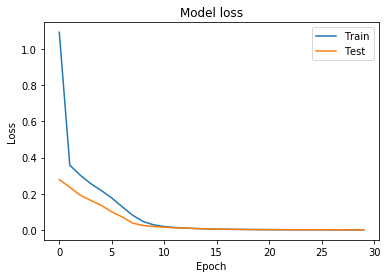

In [158]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

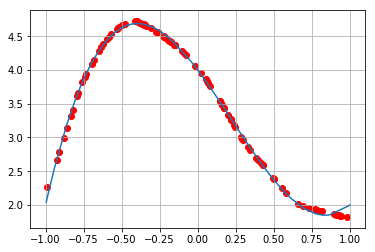

In [162]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Osservo che la rete neurale fa estremamente fatica a lavorare in regioni in cui ha "visto" pochi dati. In particolare dunque è in difficoltà nelle code, dove non sono riuscito ad ottenere risultati significativamente migliori di questo. Questo effetto è ancora più evidente se si chiede alla rete neurale di predire risultati al di fuori della regione di cui "sa" qualcosa. Per esempio, spingendo la richiesta di predizione sul più ampio intervallo $[-1.5,1.5]$:

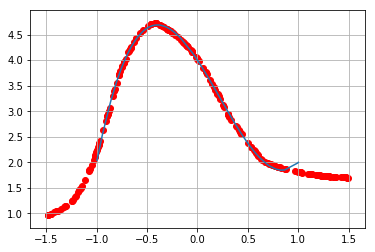

In [174]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

# Funzione in due dimensioni # 
  
Tento ora di estendere il mio modello di rete neurale ad una funzione di due variabili reali (una superficie), precisamente:
$$
f(x,y) = \sin(x^2+y^2) \,\,\,\,;\,\,\, x \in [-3/2,3/2] \,\,\,\,\, ; \,\,\,\,\, y \in [-3/2,3/2]
$$
Comincio a generare i dataset di training e di validazione.

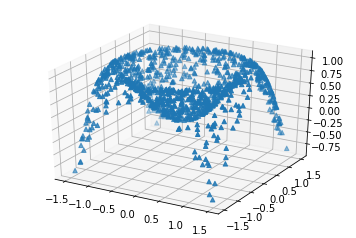

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

np.random.seed(0)
num_training = 20000 # Numero di dati di training
num_valid = 1000     # Numero di dati di validazione
x_train = np.random.uniform(-1.5, 1.5, num_training)
y_train = np.random.uniform(-1.5, 1.5, num_training)
x_valid = np.random.uniform(-1.5, 1.5, num_valid)
y_valid = np.random.uniform(-1.5, 1.5, num_valid)
z_target = np.sin(x_valid**2 + y_valid**2)

sigma = 0.00 # Rumore per sporcare i dati.
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

ax.scatter(x_valid, y_valid, z_valid, cmap=cm.coolwarm, marker=m)

plt.show()

In questo blocco preparo la rete neurale. Mi aspetto che debba essere un po' più complessa di quella usata per il fit di una funzione bidimensionale.

In [187]:
# In questo blocco preparo la rete neurale.
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()  # Modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # In questo caso l'input è una coppia di valori.
model.add(Dense(20,activation = 'tanh'))   # Qui ho un altro layer di 10 neuroni con una RELU come
# funzione di attivazione.
model.add(Dense(20,activation = 'tanh'))
model.add(Dense(20,activation = 'tanh'))
model.add(Dense(1,)) # Il layer di uscita ha un solo neurone, per ora senza funzione di attivazione.

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_201 (Dense)            (None, 20)                40        
_________________________________________________________________
dense_202 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_203 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_204 (Dense)            (None, 1)                 21        
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


In questo blocco eseguo il training della rete neurale.

In [188]:
bsize =32  # Dimensione del batch
lst = []
lst.append(x_train)
lst.append(y_train)
input_train = [x_train, y_train]  # Lista per i dati di training
input_valid = [x_valid, y_valid]
history=model.fit(x=lst, y=z_train, 
          batch_size=bsize, epochs=20, 
          validation_data=(input_valid, z_valid))

Train on 20000 samples, validate on 1000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 166us/sample - loss: 0.1541 - mean_squared_error: 0.1541 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 2/20
20000/20000 [==============================] - 2s 114us/sample - loss: 0.1496 - mean_squared_error: 0.1496 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 3/20
20000/20000 [==============================] - 2s 116us/sample - loss: 0.1495 - mean_squared_error: 0.1495 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 4/20
20000/20000 [==============================] - 2s 117us/sample - loss: 0.1495 - mean_squared_error: 0.1495 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 5/20
20000/20000 [==============================] - 2s 116us/sample - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 6/20
20000/20000 [==============================] - 2s 114us/sample - loss: 0.1495 - mean_squar

Valuto ora la capacità predittiva della rete neurale.

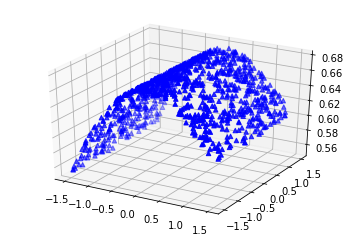

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
lst = [x_predicted, y_predicted]
z_predicted = model.predict(lst)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_predicted, y_predicted, z_predicted, c=c, marker=m)

plt.show()